In [123]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
f = pd.read_csv('state.csv')

In [29]:
f.head()

,State,Population,Murder.Rate,Abbreviation
0,Alabama,4779736,5.7,AL
1,Alaska,710231,5.6,AK
2,Arizona,6392017,4.7,AZ
3,Arkansas,2915918,5.6,AR
4,California,37253956,4.4,CA


In [21]:
round(stats.trim_mean(f['Population'],0.05),1)

5316411.5

In [20]:
f['Population'].mean()

6162876.3

In [22]:
f['Population'].median()

4436369.5

In [24]:
np.average(f['Murder.Rate'],weights=f['Population'])

4.445833981123393

In [25]:
f['Population'].std()

6848235.347401142

In [32]:
f['Population'].quantile(0.9) - f['Population'].quantile(0.1)

11825645.700000001

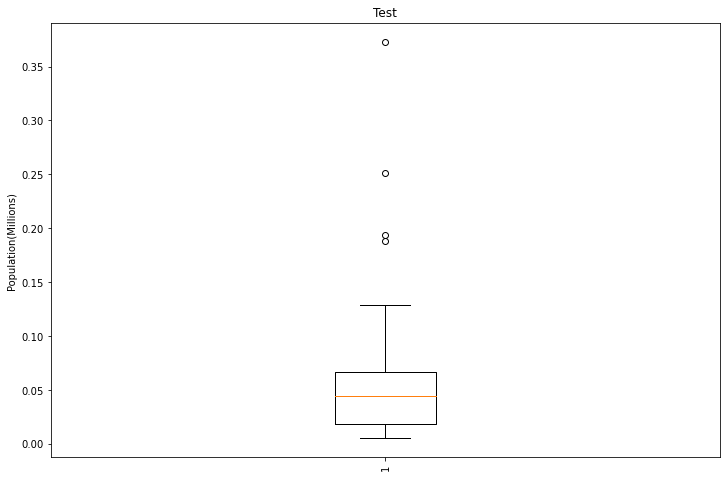

In [79]:
plt.figure(figsize=(12,8))
plt.boxplot(f['Population']/100_000_000)
plt.title('Test')
plt.ylabel('Population(Millions)')
plt.xticks(rotation=90)
plt.show()

In [70]:
f['Murder.Rate'].quantile([0.05,0.5,0.95])

0.05    1.60
0.50    4.00
0.95    6.51
Name: Murder.Rate, dtype: float64

In [77]:
print(f'{0.2:.2%}')

20.00%


# Boxplaination interpret

box boundary upper is the 75% quantile, lower is the 25% quantile.  
The line inside the box indicates the median.  
boxupper-boxlower = interquantile range (IQR)  
Whiskers extent to box-upper+1.5*IQR and box-lower-1.5*IQR, but if the upper and lower limt is lower than this limt,  
the extent till the maximum or the minimum number of the dataset. 


In [105]:
cutted = pd.cut(f['Population'],5)

In [106]:
df = pd.DataFrame(cutted.value_counts())

In [107]:
df.index.names = ['Range']

In [108]:
df

,Population
Range,
"(526935.67, 7901692.0]",38
"(7901692.0, 15239758.0]",8
"(15239758.0, 22577824.0]",2
"(29915890.0, 37253956.0]",1
"(22577824.0, 29915890.0]",1


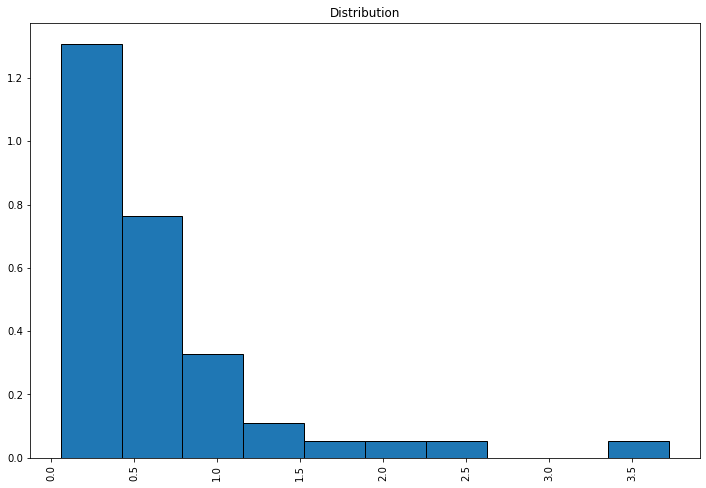

In [122]:
plt.figure(figsize=(12,8))
plt.hist(f['Population']/10_000_000, edgecolor='k',bins=10,density=True)
plt.title('Distribution')
plt.xticks(rotation=90)
plt.show()

<AxesSubplot:xlabel='Population', ylabel='Count'>

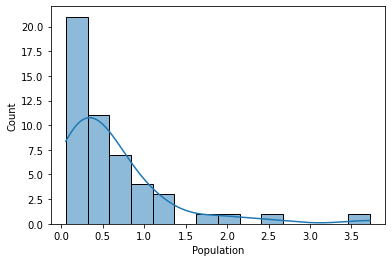

In [128]:
sns.histplot(f['Population']/10_000_000,kde=True)